In [7]:
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [9]:
!pip install sklearn
!pip install keras

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=77e88cda2fcca4c5ee62e6cba83aebf17e6dc91c445de5b52c848b9cf1e5f6b5
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\23\9d\42\5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)


In [10]:
!pip install tensorflow
!pip install matplotlib

  Using cached clang-5.0.tar.gz (30 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached wrapt-1.12.1.tar.gz (27 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached cached_property-1.5.2-py2.py3-none-any.whl (7.6 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using

In [1]:
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D




In [2]:
train_dir = '/ASL/asl_alphabet_train/asl_alphabet_train/'

# Directory with our training human pictures
test_dir = '/ASL/asl_alphabet_test/asl_alphabet_test'

In [3]:
import os

print('total training images:', len(os.listdir(test_dir)))
print('total training images:', len(os.listdir(train_dir)))

total training images: 28
total training images: 29


In [5]:
train_dir_A = '/ASL/asl_alphabet_train/asl_alphabet_train/A'
train_dir_B = '/ASL/asl_alphabet_train/asl_alphabet_train/B'

In [6]:
train_names_A = os.listdir(train_dir_A)
train_names_B = os.listdir(train_dir_B)
print(train_names_A[:10])

['A1.jpg', 'A10.jpg', 'A100.jpg', 'A1000.jpg', 'A1001.jpg', 'A1002.jpg', 'A1003.jpg', 'A1004.jpg', 'A1005.jpg', 'A1006.jpg']


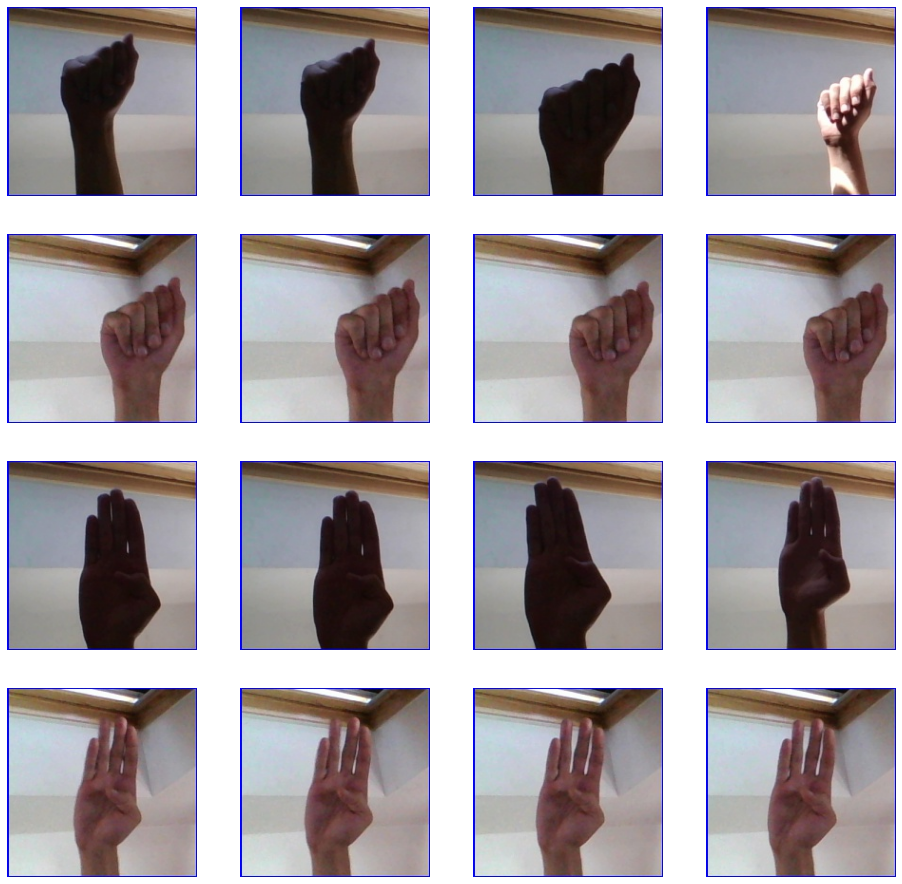

In [7]:
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
A_pix = [os.path.join(train_dir_A, fname) 
                for fname in train_names_A[pic_index-8:pic_index]]
B_pix = [os.path.join(train_dir_B, fname) 
                for fname in train_names_B[pic_index-8:pic_index]]

for i, img_path in enumerate(A_pix+B_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [13]:
import pandas as pd

In [14]:
train_df = get_paths_labels('/ASL/asl_alphabet_train/asl_alphabet_train')

# Import another dataset (to train model on various data)
temp_df = get_paths_labels('/ASL/asl-alphabet-test')

# Combine both datasets
dataset = pd.concat((train_df, temp_df))

NameError: name 'get_paths_labels' is not defined

In [2]:
TRAIN_BATCH_SIZE=64
VAL_BATCH_SIZE=8
TARGET_SIZE=224

In [3]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1,
    horizontal_flip = True,
    brightness_range=(0.75, 1.3),
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
  
)

train_datagen = datagen.flow_from_directory(
    "/ASL/asl_alphabet_train/asl_alphabet_train/",
    class_mode="binary",
    target_size=(TARGET_SIZE, TARGET_SIZE),
    batch_size=TRAIN_BATCH_SIZE,
    subset="training"
)

val_datagen = datagen.flow_from_directory(
    "/ASL/asl_alphabet_train/asl_alphabet_train/",
    class_mode="binary",
    target_size=(TARGET_SIZE, TARGET_SIZE),
    batch_size=VAL_BATCH_SIZE,
    subset="validation"
)

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


In [4]:
resnet = tf.keras.applications.resnet50.ResNet50(
    include_top=False, weights='imagenet'
)

In [5]:
resnet.trainable = False
transfer_model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(TARGET_SIZE, TARGET_SIZE, 3)),
  resnet,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

transfer_model.compile(optimizer=tf.keras.optimizers.RMSprop(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
transfer_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              102761472 
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1025      
Total params: 126,350,209
Trainable params: 102,762,497
Non-trainable params: 23,587,712
_________________________________________________________________


In [12]:
hist = transfer_model.fit(
    train_datagen,
    validation_data=val_datagen,
    steps_per_epoch=train_datagen.n / TRAIN_BATCH_SIZE,
    validation_steps=val_datagen.n / VAL_BATCH_SIZE,
    epochs=10
)

Epoch 1/10
  20/1223 [..............................] - ETA: 2:01:44 - loss: -3180.5703 - accuracy: 0.0414

ResourceExhaustedError:  OOM when allocating tensor with shape[100352,1024] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[node RMSprop/RMSprop/update/mul_2 (defined at <ipython-input-12-ff3e4a0d8c49>:6) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_9866]

Function call stack:
train_function


In [6]:
import pickle

In [9]:

from keras.models import load_model
transfer_model.save('models.h5')

C:\Users\USER\AppData\Local\R-MINI~1\envs\r-reticulate\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [60]:
cnn_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), input_shape=(TARGET_SIZE, TARGET_SIZE, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer=tf.keras.optimizers.Adam(1e-2), loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
batch_normalization_4 (Batch (None, 148, 148, 16)      64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
batch_normalization_5 (Batch (None, 72, 72, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)       

In [61]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", min_delta=1e-2, patience=10, verbose=1, restore_best_weights=True)
reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=1e-1, patience=5, verbose=1, min_delta=1e-2)

In [62]:
models = cnn_model.fit(
    train_datagen,
    validation_data=val_datagen,
    steps_per_epoch=train_datagen.n / TRAIN_BATCH_SIZE,
    epochs=50,
    callbacks=[early_stop, reduce_lr_on_plateau]
)

Epoch 1/50
  36/1223 [..............................] - ETA: 25:56 - loss: -428.4268 - accuracy: 0.0347

KeyboardInterrupt: 